# 정규방정식

In [17]:
import numpy as np

무작위 선형 데이터셋 생성

In [18]:
np.random.seed(42)

In [19]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

절편 1 추가

In [20]:
X_b = np.c_[np.ones((100,1)), X]

In [21]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [22]:
theta_best

array([[4.51359766],
       [2.98323418]])

In [23]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)

In [24]:
y_predict

array([[ 4.51359766],
       [10.48006601]])

In [25]:
import matplotlib.pyplot as plt

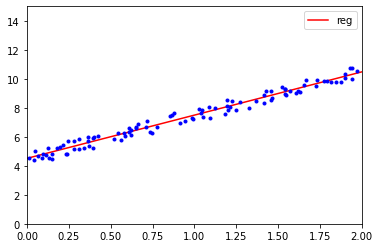

In [26]:
plt.plot(X_new, y_predict, "r-", label="reg")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.legend()
plt.show()

위 과정을 scikit-learn을 활용하여 간단히 실행

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [29]:
lin_reg.intercept_, lin_reg.coef_

(array([4.51359766]), array([[2.98323418]]))

In [30]:
lin_reg.predict(X_new)

array([[ 4.51359766],
       [10.48006601]])

In [31]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)

In [32]:
theta_best_svd

array([[4.51359766],
       [2.98323418]])

선형대수학 SVD분해 참고!<br>
계산 효율성

# 경사하강법(Gradient Descent)

In [34]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)

for interation in range(n_iterations):
  gradients =2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

In [35]:
theta

array([[4.51359766],
       [2.98323418]])

위의 정규방정식의 결과와 동일함을 알 수 있다

# 확률적 경사하강법(Stocastic Gradient Descent)

In [39]:
n_epochs = 50
t0, t1 = 5, 50
m = 100

def learning_schedule(t):
  return t0 / (t+ t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index: random_index + 1]
    yi = y[random_index: random_index + 1] # 학습 세트 중 랜덤으로 샘플 추출
    gradients = 2*xi.T.dot(xi.dot(theta) - yi) # 추출한 샘플로 그래디언트 벡터 구함
    eta = learning_schedule(epoch * m + i) # 학습 스케쥴을 샘플마다 업데이트 (점차 작게)
    theta = theta - eta * gradients # theta에 gradient 반영

In [40]:
theta

array([[4.52063638],
       [2.98828201]])

In [41]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

# 다항 회귀

In [42]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 +np.random.rand(m,1)